# Linguistics analysis for different age groups

### High-level Steps:
1. Performing raw data analysis, manual and WordCloud
2. Preprocessing the data (removal of < 18yr)
3. Feature engineering using syntactic parsing
4. Syntactic feature comparison with GPT4 output text, using openai API
5. Forecasting age_group using multiple modeling techniques for understanding the data stochasticity or pattern recognition

## OpenAI api over gpt-4 model: Comparative text generation and analysis

#### Wordcloud based on GPT4's text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/surbhitkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


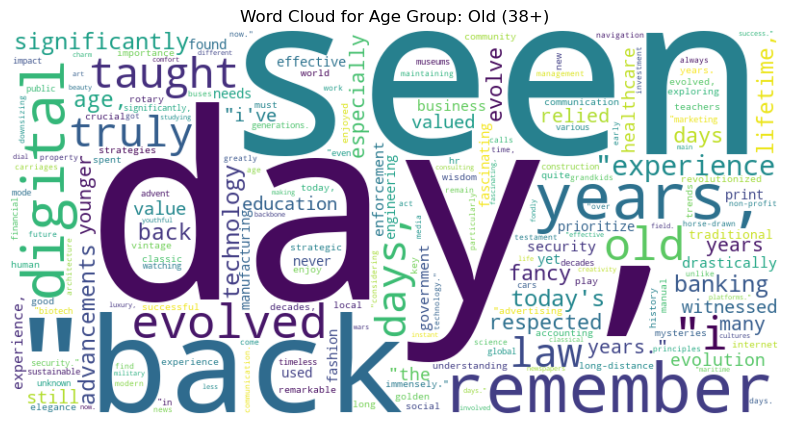

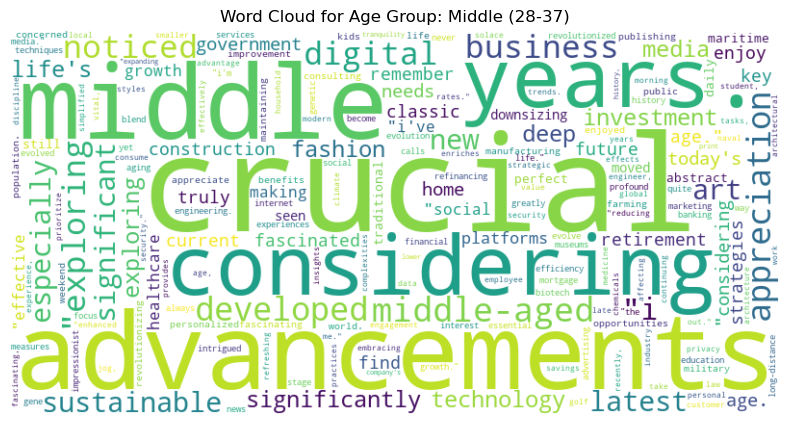

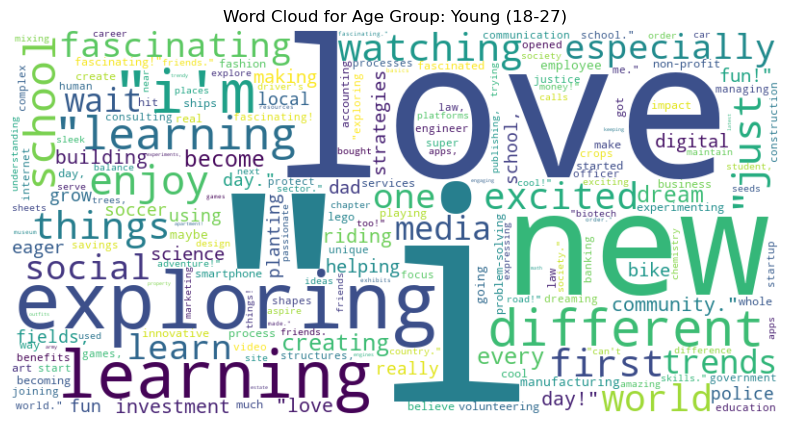

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Load NLTK stop words
nltk.download('stopwords')
stop_words_nltk = set(stopwords.words('english'))

# Load the dataset
df = pd.read_csv('new_text_data_1000.csv')

# Function to generate word clouds for a specific age group
def generate_word_cloud(age_group):
    # Filter data for the given age group
    age_group_df = df[df['age_group'] == age_group]
    
    # Concatenate text from all rows in the age group
    text = ' '.join(age_group_df['text'].values)

    # Convert all text to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = text.split()

    # Remove stop words and other specified words
    words = [word for word in words if word.lower() not in STOPWORDS and word.lower() not in stop_words_nltk]

    # Count word frequencies
    word_freq = Counter(words)

    # Determine the top 20% most common words to remove
    num_top_words = int(len(word_freq) * 0)
    top_words = set([word for word, _ in word_freq.most_common(num_top_words)])

    # Remove the top 20% most common words
    words = [word for word in words if word not in top_words]

    # Recount word frequencies
    word_freq = Counter(words)

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, contour_width=3, contour_color='steelblue')

    # Generate the word cloud
    wordcloud.generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Age Group: {age_group}')
    plt.show()

# Add age groups to the dataframe based on age
df['age_group'] = pd.cut(df['age'], bins=[17, 27, 37, 100], labels=['Young (18-27)', 'Middle (28-37)', 'Old (38+)'])

# Generate word clouds for each age group
for age_group in df['age_group'].unique():
    generate_word_cloud(age_group)


#### Generate Syntactic Comparison:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the datasets
pivot_file_df = pd.read_csv('pivot_file_new_even2500.csv')
t3_pivot_file_df = pd.read_csv('T3-pivot_file_finaldf_full.csv')

# Add an 'age_group' column based on the index
pivot_file_df['age_group'] = pivot_file_df.index
t3_pivot_file_df['age_group'] = t3_pivot_file_df.index

# Merge the datasets based on row labels
merged_df = pd.merge(pivot_file_df, t3_pivot_file_df, on='age_group', suffixes=('_blogtext', '_chatGPT'))

common_columns = ["Young", "Middle Aged", "Old"]

# Define the parameters
parameters = [
    'Adjective Rate', 'Adverb Rate', 'Clause Rate', 'Closed-class Word Rate', 'Conjunction Rate',
    'Content Density', 'Determiner Rate', 'Dependent Clause Rate', 'Discourse Marker Rate',
    'First Person Singulars Rate', 'Idea Density', 'Infinitive Phrase Rate', 'Max Yngve Depth',
    'Mean Yngve Depth', 'Noun Phrase Rate', 'Noun Ratio', 'Noun-Verb Ratio', 'Number of Clauses',
    'Number of Dependent Clauses', 'Number of Discourse Markers', 'Number of Infinitive Phrases',
    'Number of Noun Phrases', 'Number of Prepositional Phrases', 'Number of Verb Phrases',
    'Open-class Word Rate', 'Parse Tree Height', 'Possessive Rate', 'Prepositional Phrase Rate',
    'Pronoun Rate', 'Pronoun-Noun Ratio', 'Proportion of Auxiliary Verbs', 'Proportion of Gerund Verbs',
    'Proportion of Inflected Verbs', 'Proportion of Nouns with Adjectives', 'Proportion of Nouns with Determiners',
    'Proportion of Participles', 'References to Self Rate', 'Swear Words Rate', 'Total Yngve Depth',
    'Unique Words Rate', 'Verb Phrase Rate', 'Verb Rate'
]

# Add 'parameters' column to the merged dataframe
merged_df['parameters'] = parameters

# Arrange the columns in the desired order
selected_columns = ['parameters'] + [f'{col}_{suffix}' for suffix in ('blogtext', 'chatGPT') for col in common_columns]

# Create the final dataframe with the selected columns
final_df = merged_df[selected_columns]
# Display the final dataframe
#final_df
# Set parameters as the index for better visualization
final_df.set_index('parameters', inplace=True)

# Define the parameters you want to keep
parameters_to_keep = [
    'Content Density', 'Max Yngve Depth', 'Mean Yngve Depth', 'Total Yngve Depth',
    'Noun Phrase Rate', 'Noun-Verb Ratio', 'Proportion of Nouns with Adjectives'
]

# Filter the rows corresponding to the desired parameters based on row labels
pre_final_df = final_df.loc[parameters_to_keep]
pre_final_df_rounded = pre_final_df.round(2)

# Function to apply color gradient to each row
def color_gradient(s, cmap='viridis', alpha=0.7):
    norm = plt.Normalize(s.min(), s.max())
    rgba = plt.cm.get_cmap(cmap)(norm(s.values))
    rgba[:, :3] *= 1.0  # Adjust the RGB channels to make the colors lighter
    rgba[:, -1] = alpha  # Set the alpha channel to control transparency
    return ['background-color: rgba({:.0f},{:.0f},{:.0f},{:.2f})'.format(*rgba[i]*255, rgba[i][-1]) for i in range(len(rgba))]

# Apply the color gradient to each row
styled_df = pre_final_df.style.apply(color_gradient, cmap='coolwarm', axis=1, alpha=0.0025).set_caption('<span style="font-size: 18px;"><b>Mean Pivot: representing per blog information</b></span>')

styled_df = styled_df.format("{:.2f}")

# Display the styled dataframe
styled_df


/var/folders/0v/wpghb8z562q7cx3ycxf7yg380000gn/T/ipykernel_29150/1486645986.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  rgba = plt.cm.get_cmap(cmap)(norm(s.values))


,Young_blogtext,Middle Aged_blogtext,Old_blogtext,Young_chatGPT,Middle Aged_chatGPT,Old_chatGPT
parameters,,,,,,
Content Density,6.34,6.28,6.70,4.27,6.22,5.37
Max Yngve Depth,7.42,7.51,8.07,4.89,4.68,4.70
Mean Yngve Depth,2.40,2.45,2.57,2.17,2.23,2.14
Total Yngve Depth,669.48,736.01,907.55,39.07,35.83,39.44
Noun Phrase Rate,5.12,4.91,6.62,3.69,3.69,4.40
Noun-Verb Ratio,1.70,1.84,1.91,1.37,2.00,2.11
Proportion of Nouns with Adjectives,0.01,0.01,0.01,0.00,0.00,0.00


#### Does GPT4 understand broad linguistic feature variance (in English) in broad age_group sets?

/Users/surbhitkumar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/surbhitkumar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


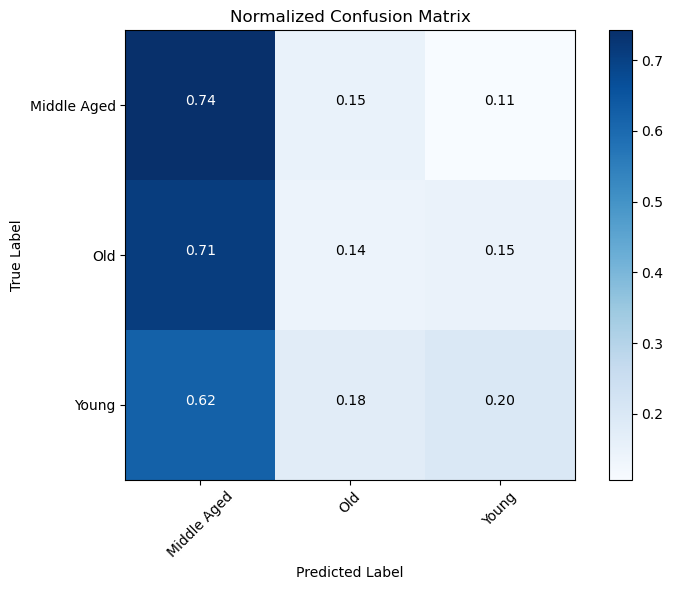


Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.74      0.36       225
           1       0.51      0.14      0.22       545
           2       0.30      0.20      0.24       230

    accuracy                           0.29      1000
   macro avg       0.35      0.36      0.28      1000
weighted avg       0.40      0.29      0.26      1000



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import joblib

# Load the new text data
new_text_data = pd.read_csv('T3-final_pca_dataframe_full.csv')

# Separate features from the new text data
X_new = new_text_data.drop(['text', 'age', 'age_group'], axis=1)

# Load the pre-trained age group prediction model saved in pkl format
model_age_group = joblib.load('stacked_models_agegroup.pkl')

# Encode age group labels to numerical format
le_age_group = LabelEncoder()
y_age_group_encoded = le_age_group.fit_transform(new_text_data['age_group'])

# Use the model to make predictions on the new text data
y_age_group_pred_labels = model_age_group.predict(X_new)

# Decode age group labels to their original format
y_age_group_pred_original = le_age_group.inverse_transform(y_age_group_pred_labels)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_age_group_encoded, y_age_group_pred_labels)
classification_rep = classification_report(y_age_group_encoded, y_age_group_pred_labels)

# Function to plot normalized confusion matrix
def plot_confusion_matrix(cm, classes, title='Normalized Confusion Matrix', cmap=plt.cm.Blues):
    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm_normalized.max() / 2.
    for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
        plt.text(j, i, format(cm_normalized[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_matrix, classes=le_age_group.classes_)
plt.show()

print("\nClassification Report:")
print(classification_rep)


#### Generate Variance Comparison

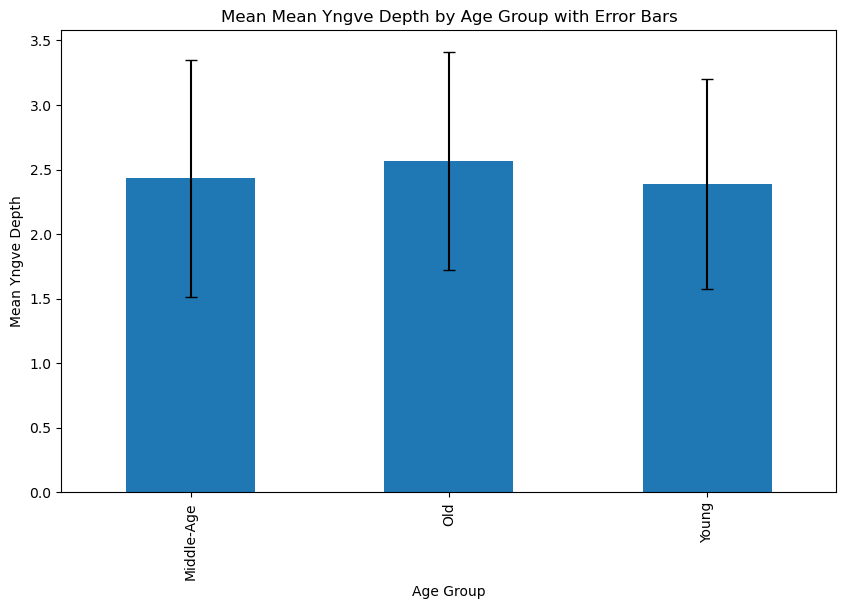

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('modified_final_dataframe.csv')

# Define the column of interest
column_name = 'Mean Yngve Depth'


# Bar Chart with Error Bars
plt.figure(figsize=(10, 6))
means = df.groupby('age_group')[column_name].mean()
stds = df.groupby('age_group')[column_name].std()
means.plot(kind='bar', yerr=stds, capsize=4)
plt.xlabel('Age Group')
plt.ylabel(column_name)
plt.title(f'Mean {column_name} by Age Group with Error Bars')
plt.show()



### Experimentation notes
#### Issues encountered:
- Key referenced research papers were based on archived with restricted access. Hence publically available data was a challenge.
- Referenced data was 2 decades old; syntactic features might not be relevant
- Data extracted had author's data who were under 18 years as well, needed removal before analysis
- Data skewness towards the young age group
- Tokenizing and Parsing data takes a long time, the initial code was monolithic (dead kernel issue) and had to be modulated to speedup
- Chat GPT seemed untrained on age (or maturity) driven linguistic changes, which couldn't generate healthy comparison
- Even after 41 features (reduced to 10 post-PCA) were used over a 10-layer ANN, accuracy was ~70% for age group segmentation

#### Notes for future work:
- If feasible, train the model and study the latest data with age_group and text
- Gather enough validation data from multiple sources
- Could try an ensemble of ANNs or any other ML technique that helps in improving the accuracy of the model
- This model could help build user-focused content in education and fields which require psychologically inspired communication.

